# Supplemental Material

Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support

Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
June 11, 2025

This file contains the supplemental materials for *Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support*. It includes a transparency report and all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/xta67/>).

------------------------------------------------------------------------

## Transparency Report 1.0 (full, 36 items; Aczel et al., 2019)

**Manuscript Title:** Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support  
**Authors:** Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
**Corresponding author’s email address:** jjcurtin@wisc.edu  
**Link to Project Repository:** <https://osf.io/xta67/>

### Preregistration Section

-   Prior to analyzing the complete data set, a time-stamped preregistration was posted in an independent, third-party registry for the data analysis plan: Yes

Comments about your Preregistration: We pre-registered our data analytic strategy on OSF.

### Methods Section

The manuscript fully describes…

-   the rationale for the sample size used (e.g., an a priori power analysis): Yes  
-   how participants were recruited: Yes  
-   how participants were selected (e.g., eligibility criteria): Yes  
-   what compensation was offered for participation: Yes  
-   how participant dropout was handled (e.g., replaced, omitted, etc): Yes  
-   how participants were assigned to conditions: N/A. There are no conditions.  
-   how stimulus materials were randomized: N/A.  
-   whether (and, if so, how) participants, experimenters, and data-analysts were kept naive to potentially biasing information: N/A. This is an observations study that does not include analysis of group or manipulations. There were no study conditions to blind.  
-   the study design, procedures, and materials to allow independent replication: Yes  
-   the measures of interest (e.g., friendliness): Yes  
-   all operationalizations for the measures of interest (e.g., a questionnaire measuring friendliness): Yes

### Results and Discussion Section

The manuscript…

-   distinguishes explicitly between “confirmatory” (i.e., prespecified) and “exploratory” (i.e., not prespecified) analyses: All analyses were pre-registered.
-   describes how violations of statistical assumptions were handled: No  
-   justifies all statistical choices (e.g., including or excluding covariates; applying or not applying transformations; use of multi-level models vs. ANOVA): Yes  
-   reports the sample size for each cell of the design: Yes  
-   reports how incomplete or missing data were handled: Yes  
-   presents protocols for data preprocessing (e.g., cleaning, discarding of cases and items, normalizing, smoothing, artifact correction): Yes

### Data, Code, and Materials Availability Section

The following have been made publicly available…

-   the (processed) data, on which the analyses of the manuscript were based: Yes  
-   all code and software (that is not copyright protected): Yes  
-   all instructions, stimuli, and test materials (that are not copyright protected): Yes  
-   Are the data properly archived (i.e., would a graduate student with relevant background knowledge be able to identify each variable and reproduce the analysis): Yes  
-   The manuscript includes a statement concerning the availability and location of all research items, including data, materials, and code relevant to the study: Yes

## Supplemental Figures

### Figure S1: Raw Predicted Probabilities

In [ ]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
suppressPackageStartupMessages(library(kableExtra))
library(patchwork)


theme_set(theme_classic())

options(knitr.kable.NA = '')

path_models_lag <- format_path(str_c("risk/models/lag"))
path_processed <- format_path(str_c("risk/data_processed/lag"))

pp_tidy <- read_csv(here::here(path_models_lag, "posteriors.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "pp_perf_tibble.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE)

pp_dem_contrast <- read_csv(here::here(path_models_lag, "pp_dem_contrast_all.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(lag = factor(lag, levels = c("0", "24", "72", "168", "336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

labels <- read_csv(here::here(path_processed, "labels_1day_0lag.csv"),
                   show_col_types = FALSE)

dem_tbl <- read_csv(here::here(path_processed, "dem_tibble.csv"),
                   show_col_types = FALSE)

labels_dem <- labels |> 
  left_join(dem_tbl, by = "subid")


preds_0 <- read_rds(here::here(path_models_lag, 
                               "final_preds_kfold_1_x_5_1day_0_v3_strat_lh_final.rds")) 
preds_24 <- read_rds(here::here(path_models_lag, 
                               "final_preds_kfold_1_x_5_1day_24_v3_strat_lh_final.rds")) 
preds_72 <- read_rds(here::here(path_models_lag, 
                               "final_preds_kfold_1_x_5_1day_72_v3_strat_lh_final.rds")) 
preds_168 <- read_rds(here::here(path_models_lag, 
                               "final_preds_kfold_1_x_5_1day_168_v3_strat_lh_final.rds")) 
preds_336 <- read_rds(here::here(path_models_lag, 
                               "final_preds_kfold_1_x_5_1day_336_v3_strat_lh_final.rds")) 

preds_all <- preds_0 |> 
  mutate(model = "No lag") |> 
  bind_rows(preds_24 |> 
              mutate(model = "1 day")) |> 
  bind_rows(preds_72 |> 
              mutate(model = "3 days")) |> 
  bind_rows(preds_168 |> 
              mutate(model = "1 week")) |> 
  bind_rows(preds_336 |> 
              mutate(model = "2 weeks")) |> 
  mutate(model = factor(model, levels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

preds_hist <- preds_all |> 
  ggplot(aes(x = prob_raw)) +
  geom_histogram(color = "black", fill = "light grey", binwidth = .10,
                 boundary = 0) +
  facet_wrap(~model) +
  labs(x = "Raw probabilities from final model") +
  scale_x_continuous(breaks = seq(0, 1, by = 0.2))


Our models produced variation in predicted probabilities, with probabilities spanning nearly the entire 0 - 1 range. The 2-week lagged model had fewer high raw probabilities (all probabilities were \< .80). Histograms of the raw predicted probabilities for the best configuration for all 5 models are presented below.

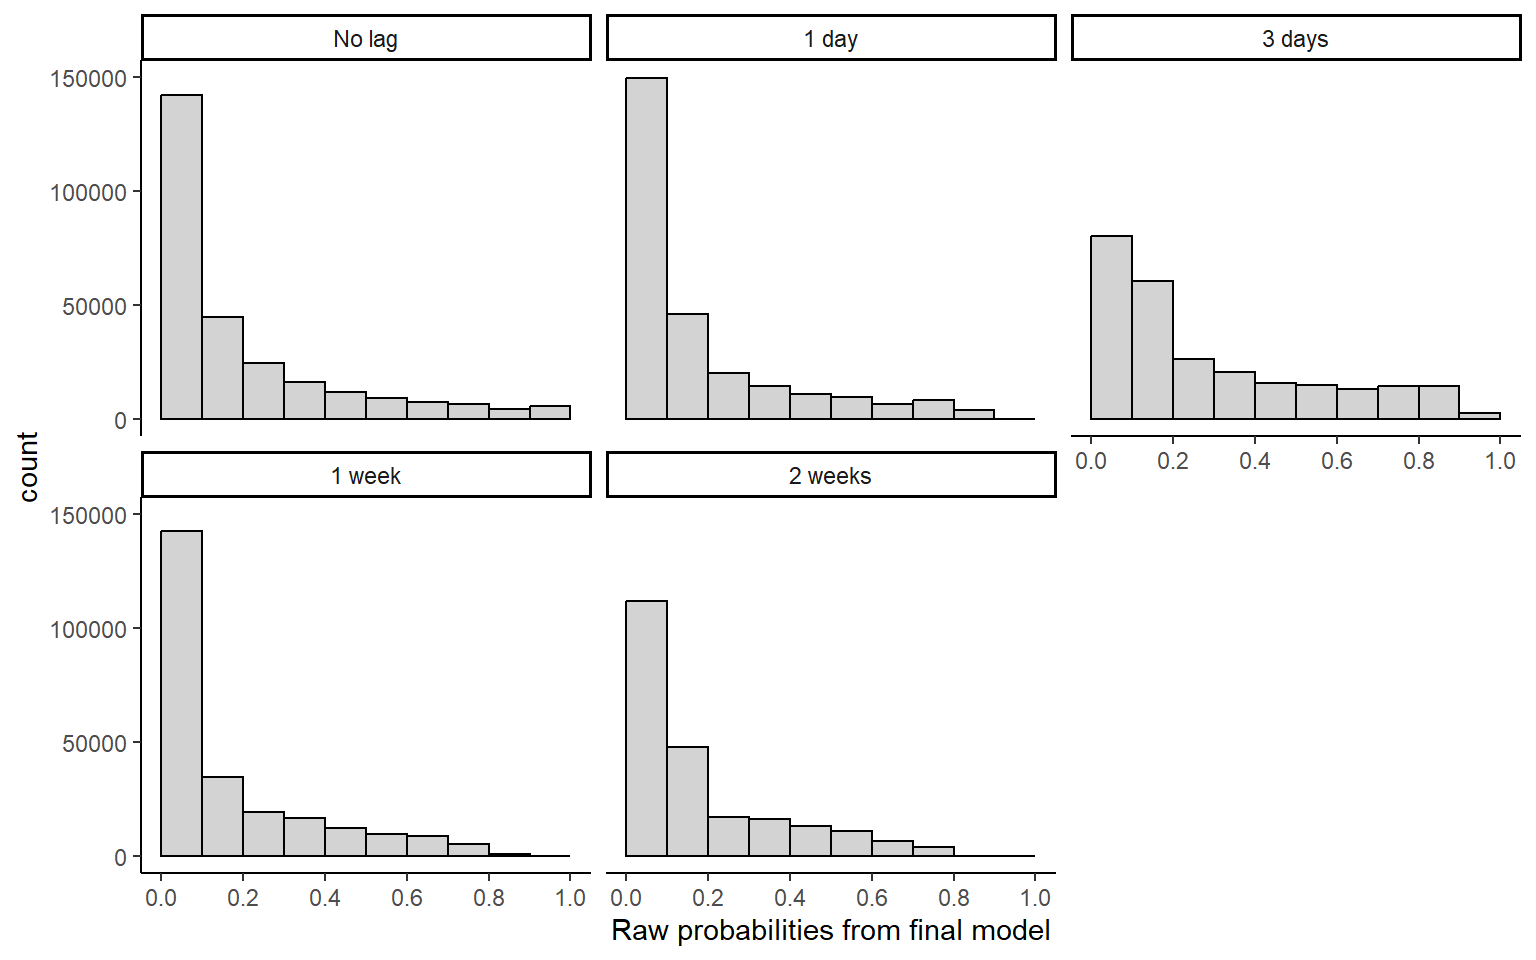

In [ ]:

preds_hist


### Figure S2: Calibration Plots for all Models

The raw probabilities produced by our final models were not well calibrated. Brier scores for the no lag model (.071) and the 2-week lag model (.077) were roughly equivalent to the base rate of lapses (.076). Below we present the calibration plots of our raw predicted lapse probabilities for each model.

In [ ]:

bin_width = 0.10

preds_all_raw <- preds_0 |> 
  mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
         lapse = if_else(label == "Lapse", 1, 0)) |> 
  mutate(model = "No lag") |> 
  bind_rows(preds_24 |> 
              mutate(bins = cut(prob_raw, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "1 day")) |> 
  bind_rows(preds_72 |> 
              mutate(bins = cut(prob_raw, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "3 days")) |> 
  bind_rows(preds_168 |> 
              mutate(bins = cut(prob_raw, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "1 week")) |> 
  bind_rows(preds_336 |> 
              mutate(bins = cut(prob_raw, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "2 weeks")) |> 
  mutate(model = factor(model, levels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

preds_all_beta <- preds_0 |> 
  mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
         lapse = if_else(label == "Lapse", 1, 0)) |> 
  mutate(model = "No lag") |> 
  bind_rows(preds_24 |> 
              mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "1 day")) |> 
  bind_rows(preds_72 |> 
              mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "3 days")) |> 
  bind_rows(preds_168 |> 
              mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "1 week")) |> 
  bind_rows(preds_336 |> 
              mutate(bins = cut(prob_beta, breaks = seq(0, 1, bin_width)), 
                     lapse = if_else(label == "Lapse", 1, 0)) |> 
              mutate(model = "2 weeks")) |> 
  mutate(model = factor(model, levels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

fig_raw <- preds_all_raw |> 
  group_by(bins, model)  |> 
  summarize(mean_lapse = mean(lapse),
            .groups = "drop") |> 
  mutate(bins = as.numeric(bins),
         midpoints = bin_width/2 + bin_width * (bins - 1))  |> 
  ggplot(data = _, aes(x = midpoints, y = mean_lapse)) +
  geom_abline(slope = 1, intercept = 0, linetype = "dotted") +
  geom_line() +
  geom_point() +
  facet_wrap(~ model) +
  labs(x = "Predicted Lapse Probability (bin mid-point)",
       y = "Observed Lapse Probability",
       title = "Raw Probabilities") +
  scale_x_continuous(breaks = seq(0, 1, bin_width),
                     limits = c(0, 1)) +
  scale_y_continuous(breaks = seq(0, 1, bin_width),
                     limits = c(0, 1)) 

fig_beta <- preds_all_beta |> 
  group_by(bins, model)  |> 
  summarize(mean_lapse = mean(lapse),
            .groups = "drop") |> 
  mutate(bins = as.numeric(bins),
         midpoints = bin_width/2 + bin_width * (bins - 1))  |> 
  ggplot(data = _, aes(x = midpoints, y = mean_lapse)) +
  geom_abline(slope = 1, intercept = 0, linetype = "dotted") +
  geom_line() +
  geom_point() +
  facet_wrap(~ model) +
  labs(x = "Predicted Lapse Probability (bin mid-point)",
       y = "Observed Lapse Probability",
       title = "Beta Calibration") +
  scale_x_continuous(breaks = seq(0, 1, bin_width),
                     limits = c(0, 1)) +
  scale_y_continuous(breaks = seq(0, 1, bin_width),
                     limits = c(0, 1)) 


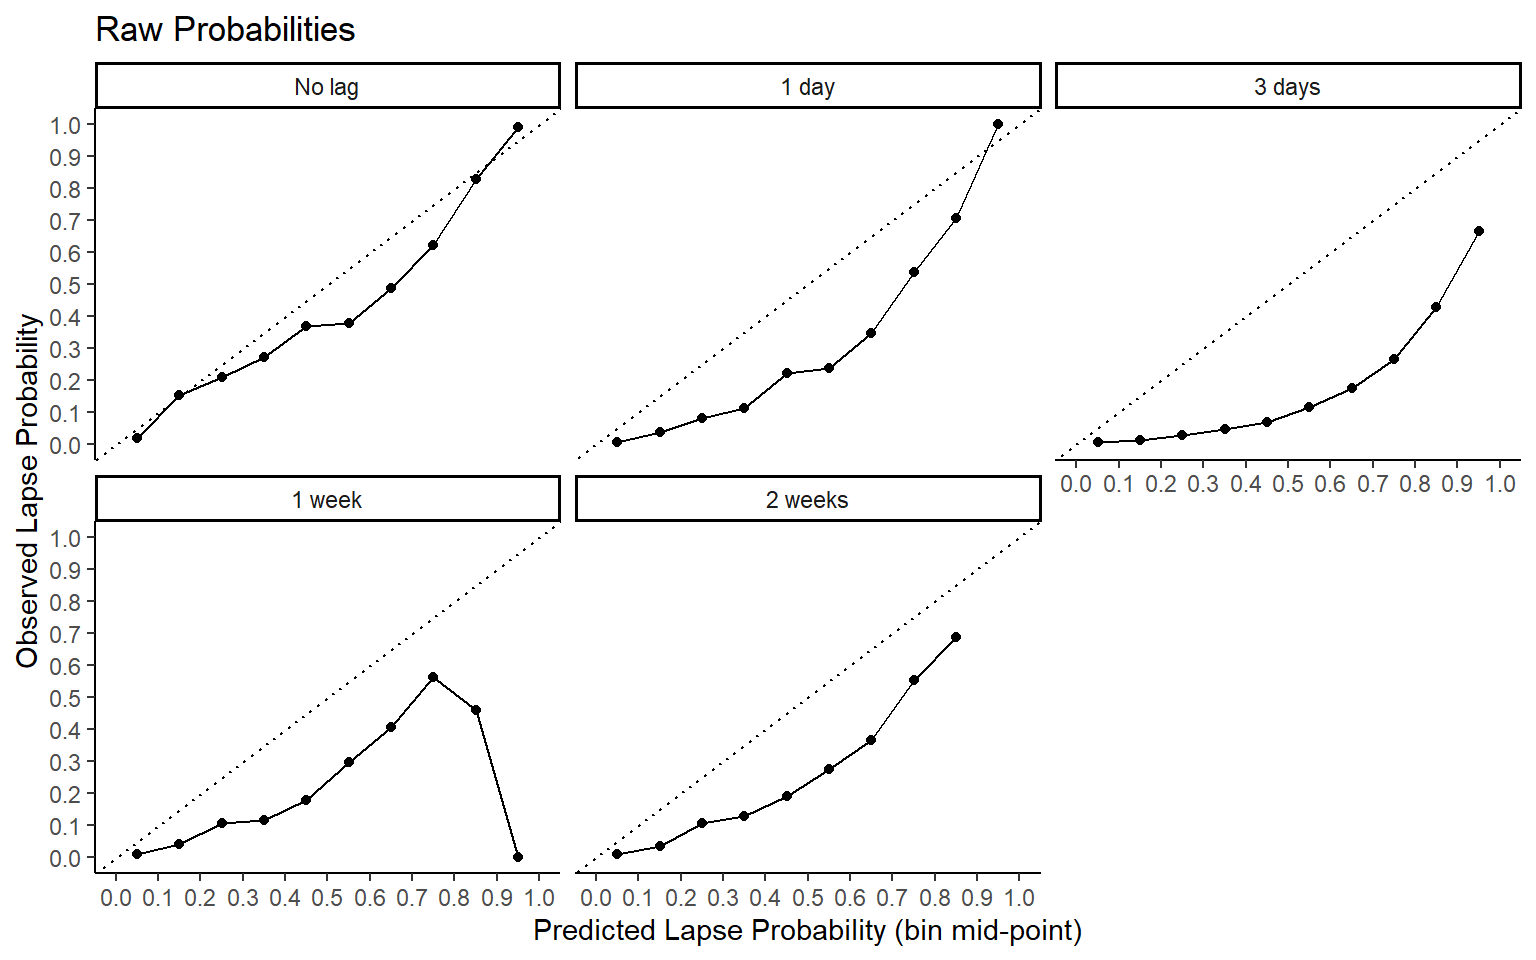

In [ ]:

fig_raw


Beta-calibration was selected as the best calibration method (i.e., it had the lowest average brier score across the no lag and 2-week lag models). Brier scores for the no lag model (.043) and the 2-week model (.061) indicated improved calibration with the beta transformation. Notably, there was a 40% reduction in error for no lag beta-calibrated probabilities compared to the no lag raw probabilities (there was a corresponding 21% reduction in error for the 2-week lag model). Below we present calibration plots for the beta-calibrated probabilities for all 5 models.

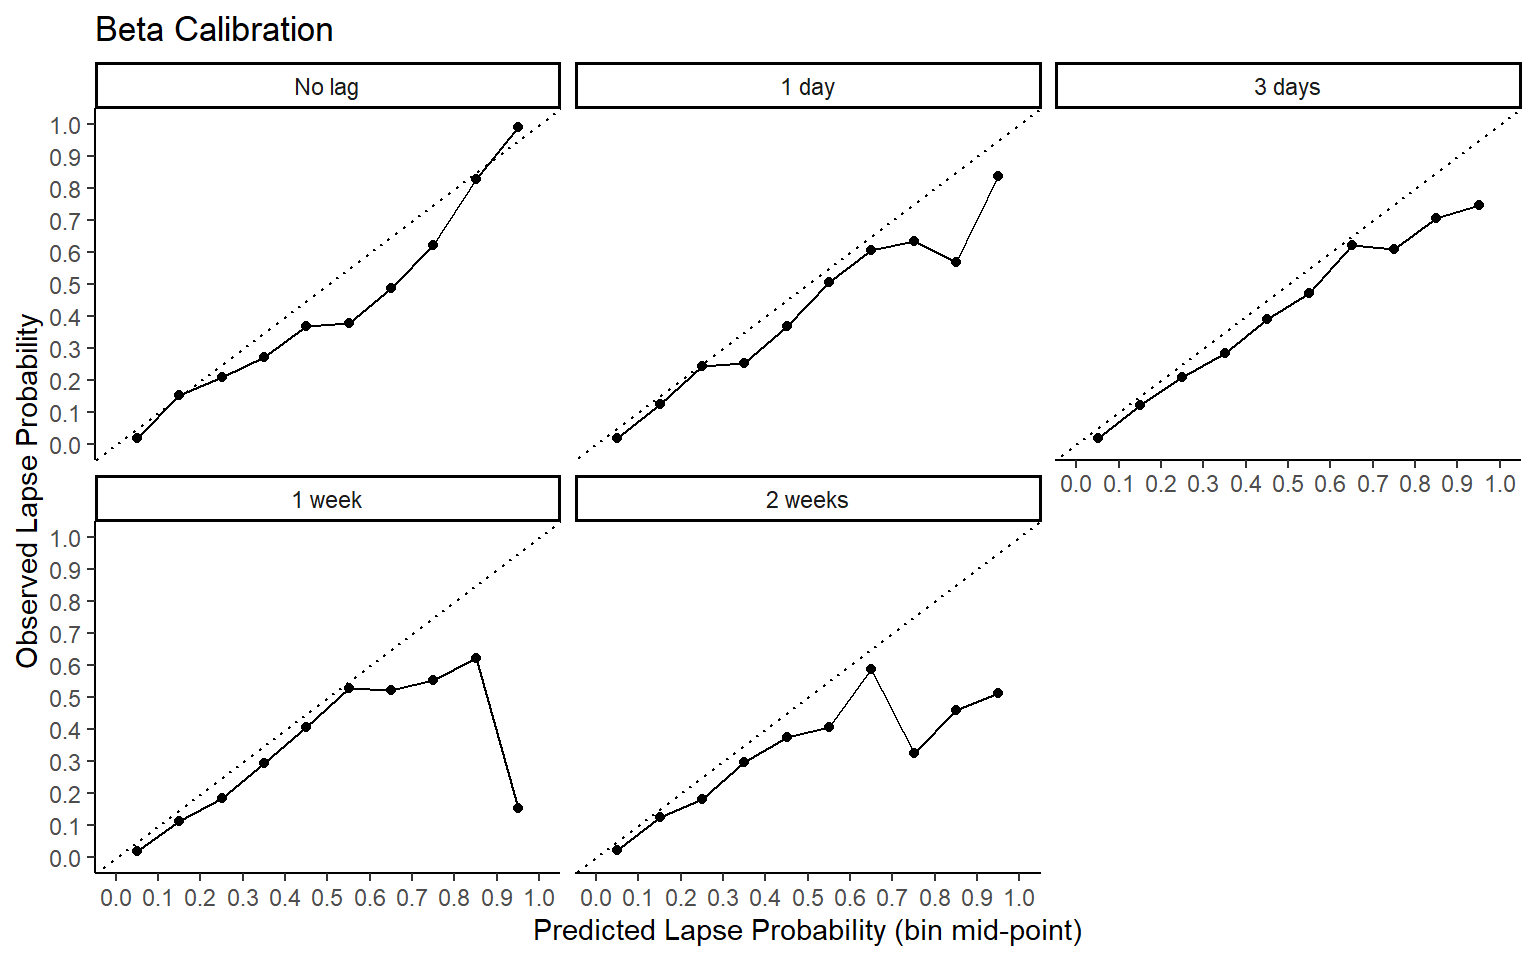

In [ ]:

fig_beta


### Figure S3: Global Shapley Plots for all 5 Models

The top globally important feature category (i.e., highest mean \|Shapley value\|) for all models was past use. Future efficacy was a strong predictor for more immediate model predictions (i.e., no lag and 1-day lag), but as lag time increased importance attenuated. On the other hand, as lag time increased past/future risky situations increased in importance. Craving was consistently important, in magnitude, across all models.

In [ ]:

shap_grp_0 <- read_rds(here::here(path_models_lag, 
                      "final_shapsgrp_kfold_1_x_5_1day_0_v3_strat_lh_final.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)")) 


shap_grp_24 <- read_rds(here::here(path_models_lag, 
                      "final_shapsgrp_kfold_1_x_5_1day_24_v3_strat_lh_final.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)")) 


shap_grp_72 <- read_rds(here::here(path_models_lag, 
                      "final_shapsgrp_kfold_1_x_5_1day_72_v3_strat_lh_final.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)")) 


shap_grp_168 <- read_rds(here::here(path_models_lag, 
                      "final_shapsgrp_kfold_1_x_5_1day_168_v3_strat_lh_final.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)")) 

shap_grp_336 <- read_rds(here::here(path_models_lag, 
                      "final_shapsgrp_kfold_1_x_5_1day_336_v3_strat_lh_final.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"))  

shap_global <- shap_grp_0 |> 
  mutate(model = "No lag") |> 
  bind_rows(shap_grp_24 |> 
              mutate(model = "1 day")) |>
  bind_rows(shap_grp_72 |> 
              mutate(model = "3 days")) |>
  bind_rows(shap_grp_168 |> 
              mutate(model = "1 week")) |>
  bind_rows(shap_grp_336 |> 
              mutate(model = "2 weeks")) |> 
  mutate(model = factor(model, levels = c("No lag", "1 day", "3 days",
                                          "1 week", "2 weeks"))) |> 
  group_by(variable_grp, model) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop")

shap_levels <- shap_global |>
  mutate(variable_grp = reorder(variable_grp, mean_value, sum)) |>
  pull(variable_grp) |>
  levels()

fig_s3 <- shap_global |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), 
           stat = "identity", position = "dodge",
           color = "black", fill = "light grey") +
  labs(y = "Mean(|Shapley Value|)",
       x = NULL,
       fill = NULL) +
  facet_wrap(~model, nrow = 1) +
  theme(axis.text=element_text(size=9.5),
        legend.key.size = unit(0.25, "cm"),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right") +
  coord_flip()


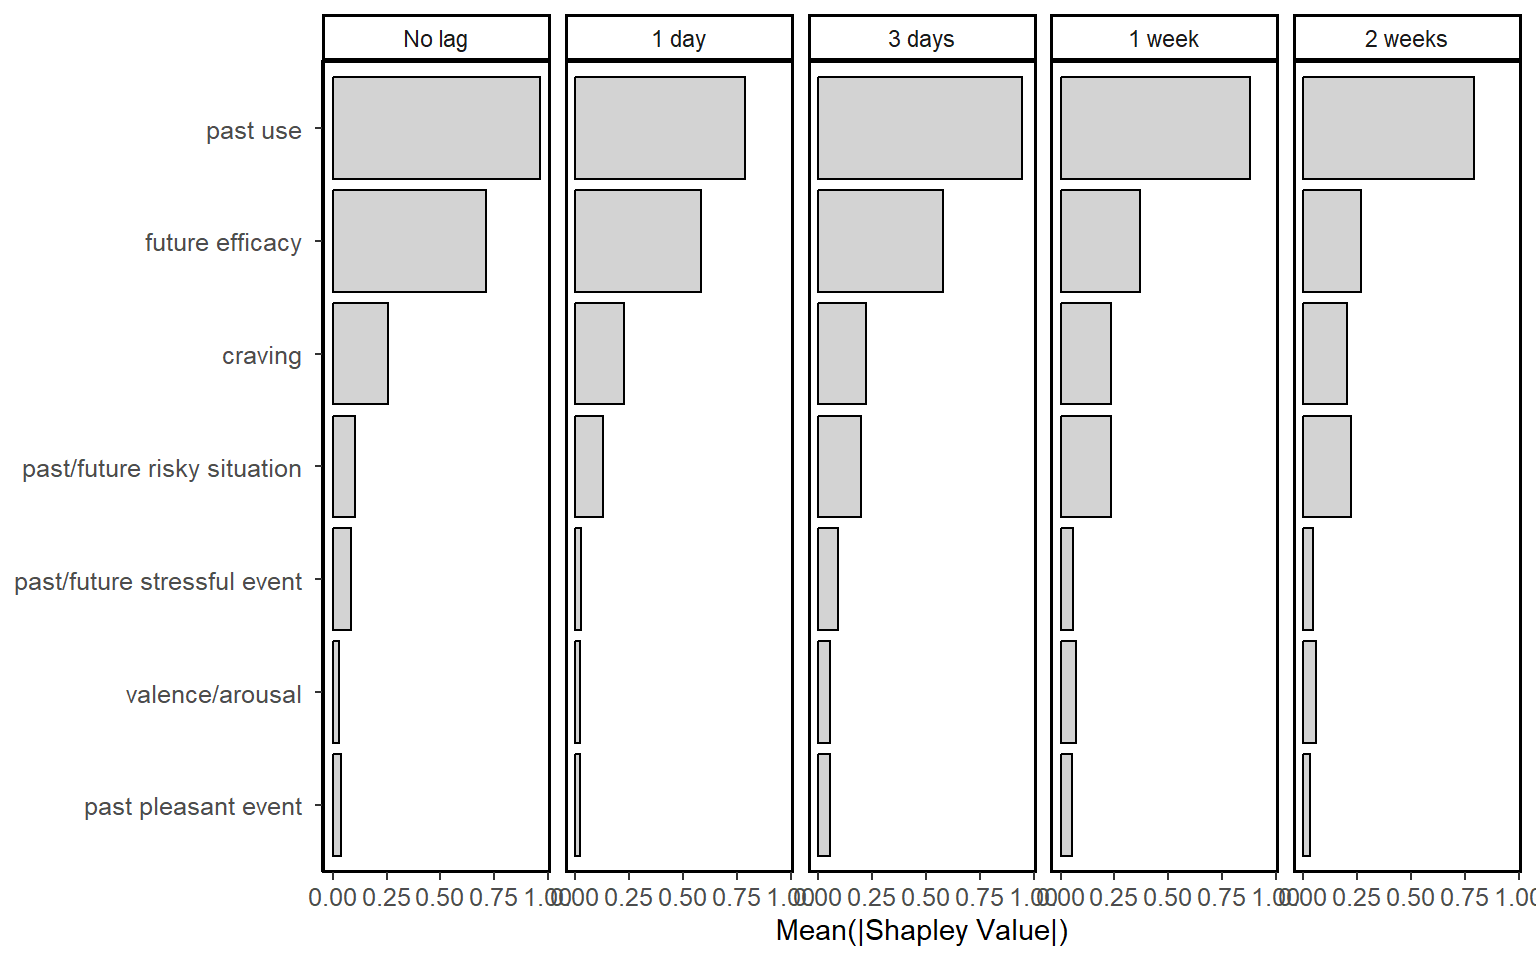

In [ ]:

fig_s3


### Figure S4: Global Shapley Plots for Baseline and 2-Week Lag Model by Demographic Group

We saw similar patterns in global feature importance across different demographic subgroups (race/ethnicity, income, sex at birth). Plots of global feature importance by demographic subgroup for the no lag and 2-week lag models are presented below.

In [ ]:

feat_0 <- read_csv(here::here(path_processed, 
                            "features_0lag_v3.csv"),
                 col_types = cols()) |> 
  select(label_num, subid, dttm_label, lapse, demo_age, demo_sex, 
         demo_income, demo_race) |> 
  arrange(label_num) 


feat_shaps_0 <- feat_0 |> 
  rename(id_obs = label_num) |>
  right_join(shap_grp_0, by = c("id_obs")) 

baseline_sex <- feat_shaps_0 |> 
  mutate(group = if_else(demo_sex == "Male", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)")),
         model = "No Lag") |> 
  group_by(model, group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  facet_wrap(~model, strip.position = "left") +
  labs(title = "Sex at Birth",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        strip.placement = "outside") +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

baseline_race <- feat_shaps_0 |> 
  mutate(group = if_else(demo_race == "White/Caucasian", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Race/Ethnicity",
       y = "Mean(|Shapley Value|)",
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()


baseline_income <- feat_shaps_0 |> 
  mutate(group = if_else(demo_income >= 1560, 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Income",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()


no_lag <- baseline_sex + baseline_race + baseline_income 


feat_336 <- read_csv(here::here(path_processed, 
                            "features_336lag_v3.csv"),
                 col_types = cols()) |> 
  select(label_num, subid, dttm_label, lapse, demo_age, demo_sex, 
         demo_income, demo_race) |> 
  arrange(label_num) 


feat_shaps_336 <- feat_336 |> 
  rename(id_obs = label_num) |>
  right_join(shap_grp_336, by = c("id_obs")) 

twoweek_sex <- feat_shaps_336 |> 
  mutate(group = if_else(demo_sex == "Male", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)")),
         model = "2-Week Lag") |> 
  group_by(model, group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  facet_wrap(~model, strip.position = "left") +
  labs(title = "Sex at Birth",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        strip.placement = "outside") +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

twoweek_race <- feat_shaps_336 |> 
  mutate(group = if_else(demo_race == "White/Caucasian", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Race/Ethnicity",
       y = "Mean(|Shapley Value|)",
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

twoweek_income <- feat_shaps_336 |> 
  mutate(group = if_else(demo_income >= 1560, 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Income",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

twoweek_lag <- twoweek_sex + twoweek_race + twoweek_income  + 
  plot_layout(guides = "collect") &
  theme(legend.position = "bottom", legend.direction = "vertical") 

fig_s4 <- no_lag/twoweek_lag 


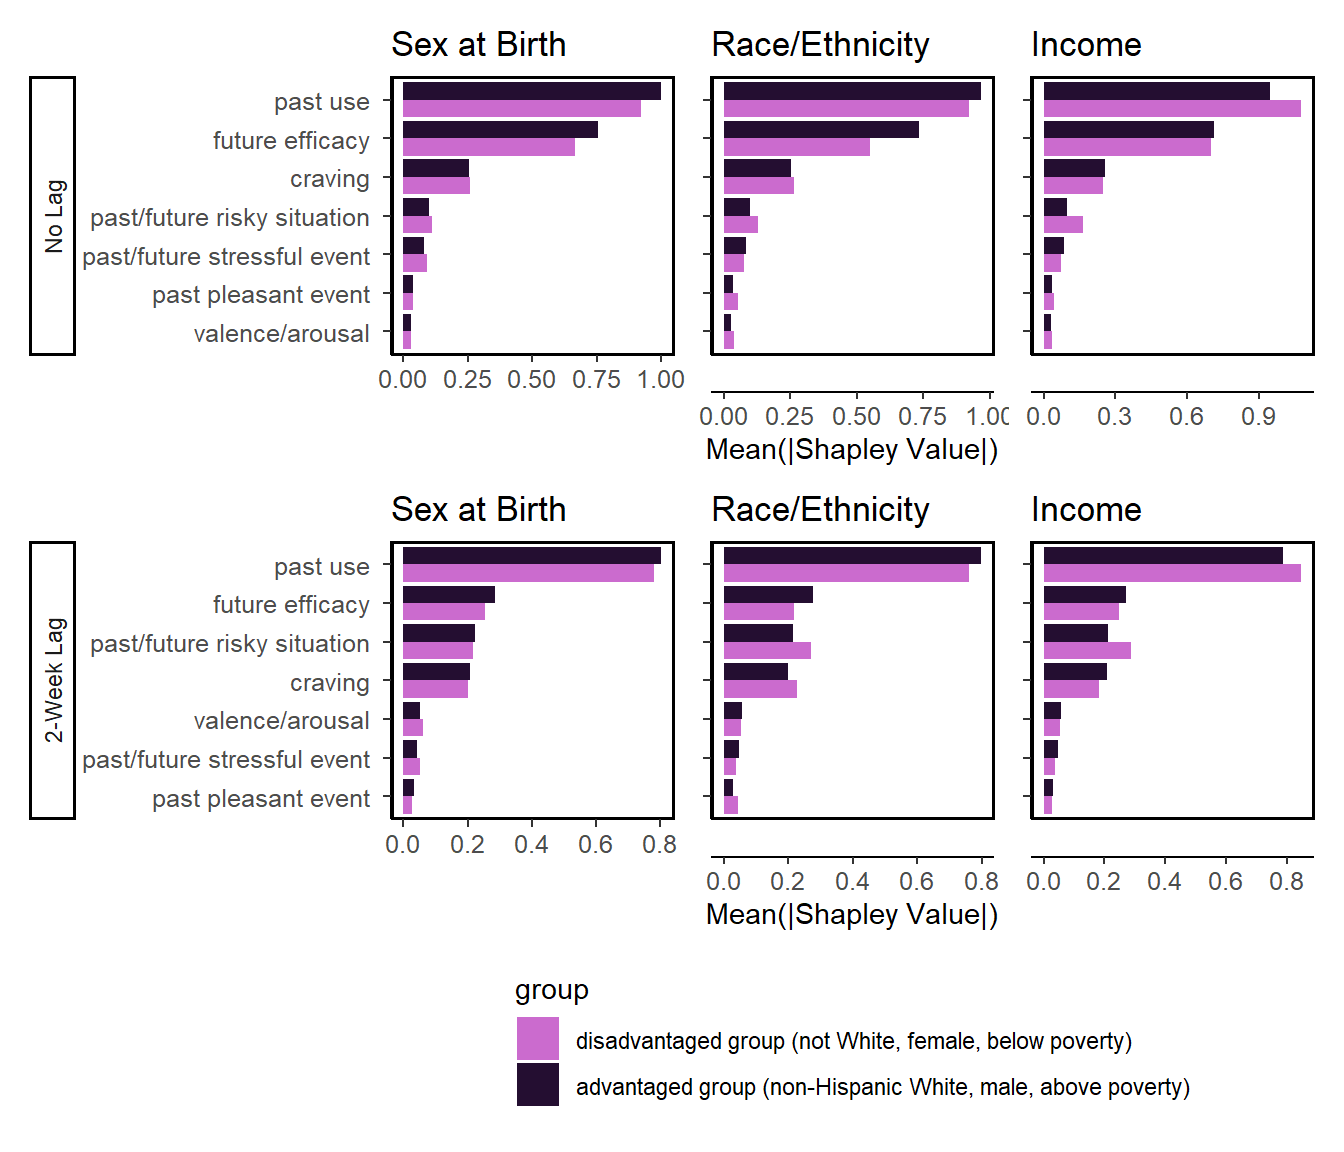

In [ ]:
fig_s4


## Supplemental Tables

### Table S1: Demographic Contrasts for all Models

In [ ]:

pp_sex <- pp_dem_contrast |> 
  filter(contrast == "male vs female") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         Median = median,
         `Bayesian CI` = ci,
         Probability = probability)

pp_income <- pp_dem_contrast |> 
  filter(contrast == "above poverty vs below poverty") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         `Median ` = median,
         `Bayesian CI ` = ci,
         `Probability ` = probability)

pp_race <- pp_dem_contrast |> 
  filter(contrast == "non-hispanic white vs not white") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         `Median  ` = median,
         `Bayesian CI  ` = ci,
         `Probability   ` = probability)

pp_sex |> 
  full_join(pp_income, by = "Lag") |> 
  full_join(pp_race, by = "Lag") |> 
  kbl() |> 
  add_header_above(c(" " = 1, "Sex at birth" = 3, "Income" = 3, "Race/Ethnicity" = 3))
